# Multiple Linear Regression 

In [1]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [95]:
#Read happiness data
happy_full_df = pd.read_csv('2017.csv')
happy_full_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
happy_full_df.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [94]:
happy_df = happy_full_df.drop(['Country','Whisker.high', 'Whisker.low','Dystopia.Residual'], axis=1)
happy_df.head()


,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
0,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


# Analysis

In [71]:
X = happy_df[['Happiness.Rank','Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.']]

y = happy_df['Happiness.Score'].values.reshape(-1, 1)

print(X.shape, y.shape)

(155, 7) (155, 1)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [85]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [96]:
print(model.intercept_)
print(model.coef_)

[ 6.8320729]
[[-0.02357377 -0.04803083  0.20725242  0.1047619   0.08698574  0.18250584
   0.25389942]]


In [97]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.988450486492189
Testing Score: 0.9868155133195949


Text(0.5,1,'Residual Plot')

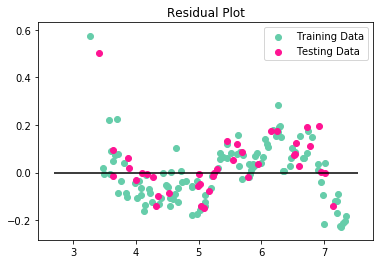

In [93]:
#pring model validation
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="mediumaquamarine", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="deeppink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")